## keras-CNN-室內室外二分類-訓練

# 引入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, image
from keras import layers
from keras import models
from keras.layers import Dropout
from keras import optimizers
from keras.models import load_model

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Using TensorFlow backend.


# 定義路徑

In [2]:
# 訓練資料路徑
train_dir = './data/train/'
# 驗證資料路徑
validation_dir = './data/validation/'
# 模型路徑
model_file_name = './model/indoor_outdoor_model.h5'

# 定義模型

In [3]:
def model():
    model = models.Sequential() # 初始序貫模型(有序)
 
    KERNEL_SIZE = (3, 3)
 
    model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
 
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
 
    model.add(Dropout(0.5))
 
    model.add(layers.Dense(1, activation='sigmoid'))
 
    model.compile(loss='binary_crossentropy', # 定義損失函數(交叉熵用於二分類)
                  optimizer=optimizers.RMSprop(lr=1e-3), # 定義優化器(方均根傳播)與學習率
                  metrics=['accuracy'])
 
    return model

# 定義損失函數

In [4]:
def loss(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'b', label='Training loss')
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# 定義準確率

In [5]:
def accuracy(history):
    history_dict = history.history
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# 定義訓練函式

In [6]:
def train(model):
    # 圖像預處理
    train_datagen = ImageDataGenerator(rescale=1. / 255)
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
 
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=256,
        class_mode='binary')
 
    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')
 
    history = model.fit_generator(
        train_generator,
        epochs=20, # 訓練20次
        validation_data=validation_generator
    )
 
    model.save(model_file_name)
 
    loss(history)
    accuracy(history)

# 開始訓練


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 561 images belonging to 2 classes.
Found 72 images belonging to 2 classes.

Epoch 1/20
1/3 [=========>....................] - ETA: 14s - loss: 0.7012 - accuracy: 0.4286

C:\Users\User\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


3/3 [==============================] - 82s 27s/step - loss: 1.8280 - accuracy: 0.4955 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20


C:\Users\User\Anaconda3\lib\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


3/3 [==============================] - 89s 30s/step - loss: 0.6891 - accuracy: 0.5383 - val_loss: 0.6334 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 94s 31s/step - loss: 0.7176 - accuracy: 0.4884 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 112s 37s/step - loss: 0.6670 - accuracy: 0.6524 - val_loss: 0.6569 - val_accuracy: 0.5139
Epoch 5/20
3/3 [==============================] - 107s 36s/step - loss: 0.9064 - accuracy: 0.4973 - val_loss: 0.6540 - val_accuracy: 0.8056
Epoch 6/20
3/3 [==============================] - 106s 35s/step - loss: 0.6653 - accuracy: 0.5758 - val_loss: 0.6203 - val_accuracy: 0.7361
Epoch 7/20
3/3 [==============================] - 143s 48s/step - loss: 0.6786 - accuracy: 0.6488 - val_loss: 0.6561 - val_accuracy: 0.6528
Epoch 8/20
3/3 [==============================] - 164s 55s/step - loss: 0.6535 - accuracy: 0.6061 - val_loss: 0.7041 - val_accuracy: 0.6250
Epoch 9/20
3/3 [=================

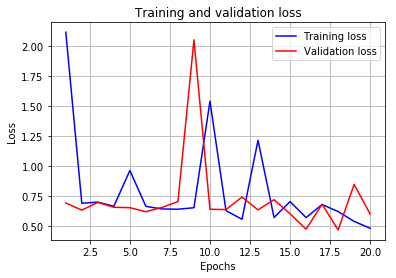

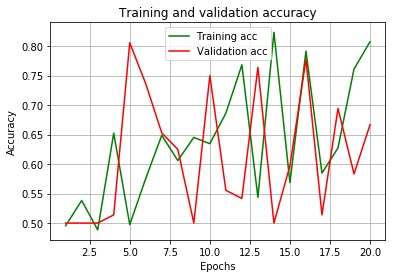

train done


In [7]:
model = model() # 初始模型
train(model) # 訓練
print('train done')